In [1]:
import sys
sys.path.append(sys.path[0] + '/deepkexpfam')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch

from utils import make_grid_data, plot_flow2D, plot_object2D
from flows import ObjectDataset, MLPLayers, AffineCouplingLayers, Flow

from Datasets import Spiral, Funnel, Ring, Grid, Banana, Uniform, Cosine, Multiring

%matplotlib inline

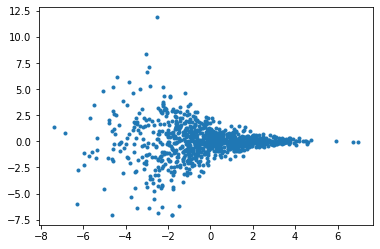

In [3]:
obj = Funnel()
X = obj.sample(1000)
plt.plot(X[:, 0], X[:, 1], '.')

In [4]:
# Spiral, Funnel, Ring, Grid, Banana, Uniform, Cosine, Multiring
d = 1
D = 2
layers = 20
batch_size = 100
iterations = 5000
lr = 0.001
weight_decay = 0.01

names = ['Funnel', 'Banana', 'Ring', 'Uniform', 'Cosine', 'Grid', 'Multiring']
objs = [Funnel(), Banana(), Ring(), Uniform(), Cosine(), Grid(), Multiring()]

names = ['Ring']
objs = [Ring()]

flows = []
for obj in objs:
    #while True:
        #try:
    flow = Flow(d, D, layers, coupling_layers='affine')
    flow.train(obj, batch_size, iterations, lr, weight_decay, show_progress=True)
    flows.append(flow)
        #except ValueError:
        #    print('Value error')
        #except RuntimeError:
        #    print('Runtime error')
        #else:
            #break

iterations = 1, log_like = -929.58051
iterations = 101, log_like = -496.41187
iterations = 201, log_like = -427.99527
iterations = 301, log_like = -419.66769
iterations = 401, log_like = -543.64569


KeyboardInterrupt: 

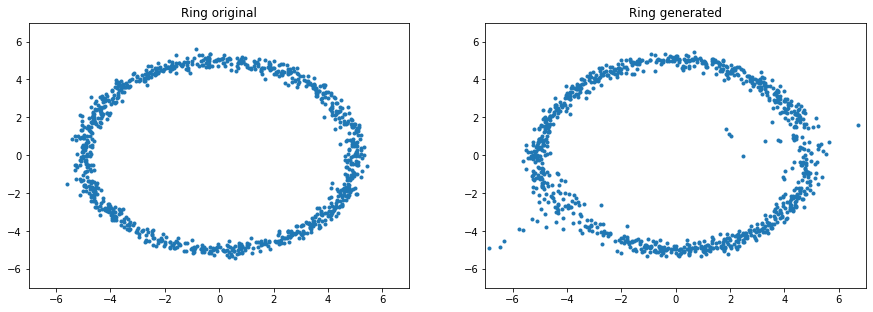

In [14]:
plt.figure(figsize=(15, 40))
for i in range(len(names)):
    name = names[i]
    obj = objs[i]
    flow = flows[i]
    
    X_obj = obj.sample(1000)
    
    plt.subplot(7, 2, 2*i+1)
    plt.plot(X_obj[:, 0], X_obj[:, 1], '.')
    plt.axis([-7, 7, -7, 7])
    plt.title(name + ' original')

    X_flow = flow.sample(1000)

    plt.subplot(7, 2, 2*i+2)
    plt.plot(X_flow[:, 0], X_flow[:, 1], '.')
    plt.axis([-7, 7, -7, 7])
    plt.title(name + ' generated')

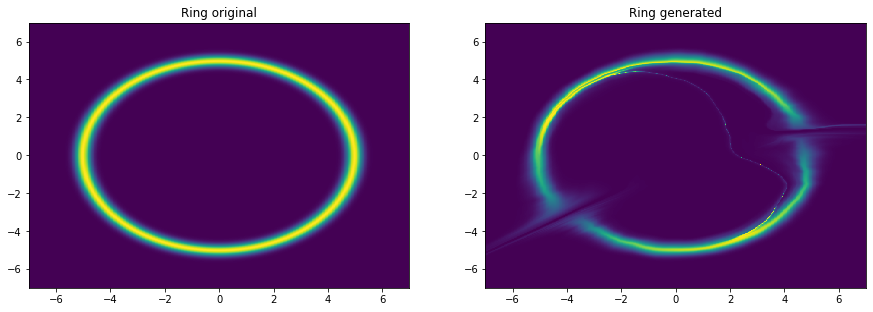

In [15]:
x_interval, y_interval = np.linspace(-7, 7, 500), np.linspace(-7, 7, 500)

plt.figure(figsize=(15, 40))
for i in range(len(names)):
    name = names[i]
    obj = objs[i]
    flow = flows[i]
    
    plt.subplot(7, 2, 2*i+1)
    plot_object2D(obj, x_interval, y_interval)
    plt.axis([-7, 7, -7, 7])
    plt.title(name + ' original')
    
    plt.subplot(7, 2, 2*i+2)
    plot_flow2D(flow, x_interval, y_interval)
    plt.axis([-7, 7, -7, 7])
    plt.title(name + ' generated')